In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/concrete.csv")

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'slag'}>,
        <Axes: title={'center': 'ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplastic'}>,
        <Axes: title={'center': 'coarseagg'}>],
       [<Axes: title={'center': 'fineagg'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'strength'}>]], dtype=object)

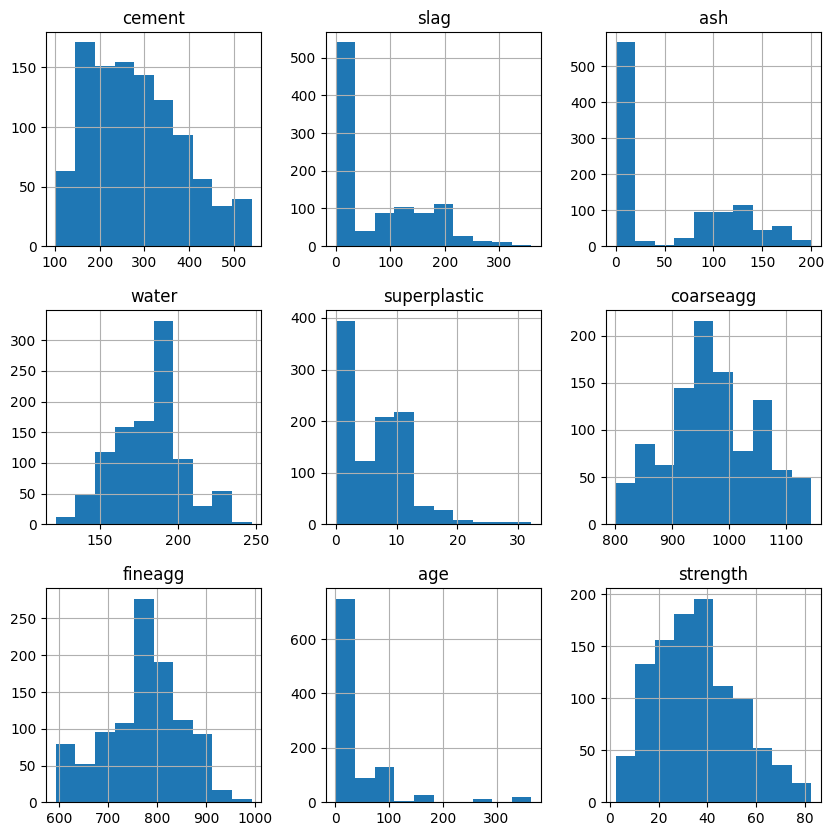

In [5]:
df.hist(figsize=(10,10))

In [7]:
df.skew(numeric_only=True)

,0
cement,0.509481
slag,0.800717
ash,0.537354
water,0.074628
superplastic,0.907203
coarseagg,-0.040220
fineagg,-0.253010
age,3.269177
strength,0.416977


<Axes: >

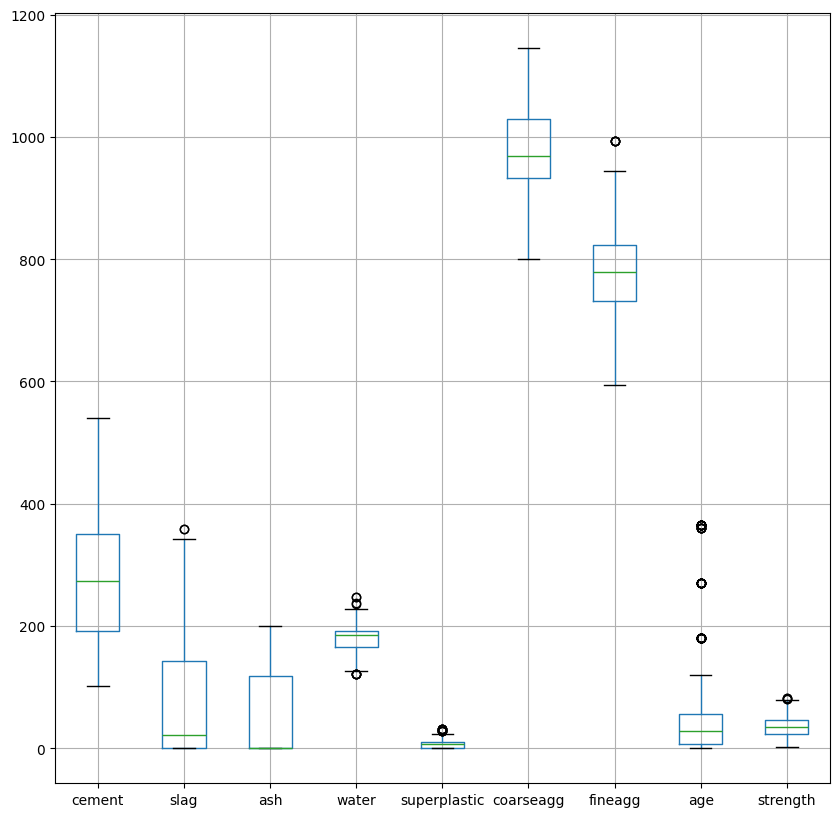

In [8]:
df.boxplot(figsize=(10,10))

In [9]:
df.corr(numeric_only=True)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [ ]:
### Corr b/w dep and indep is very less.So linear reg is not a good choice

In [11]:
X=df.drop("strength",axis=1)
Y=df["strength"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [34]:
from sklearn.svm import SVR
model_svr=SVR(kernel="linear",gamma="auto")
model_svr.fit(X_train,Y_train)

SVR(gamma='auto', kernel='linear')

In [35]:
model_svr.score(X_train,Y_train)

0.5931237947070216

In [36]:
model_svr.score(X_test,Y_test)

0.6132254465897192

In [79]:
from sklearn.tree import DecisionTreeRegressor
model_dtr=DecisionTreeRegressor(max_depth=5,min_samples_split=0.008)
model_dtr.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=0.008)

In [80]:
model_dtr.score(X_train,Y_train)

0.8125161202108675

In [81]:
model_dtr.score(X_test,Y_test)

0.7155305161775984

In [57]:
### Overfitting challenges/ underfitting

In [ ]:
from sklearn.ensemble import RandomForestRegressor